<a href="https://colab.research.google.com/github/SZPiho/Classification-using-cifar10-dataset/blob/main/Classification_using_cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [6]:
 classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [9]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [10]:
model.compile(optimizer='adam',loss=tf.losses.sparse_categorical_crossentropy,metrics=['sparse_categorical_accuracy'])

In [11]:
history=model.fit(x_train,y_train,batch_size=10,epochs=10,verbose=2,validation_data=(x_test,y_test))

Epoch 1/10
5000/5000 - 87s - loss: 1.4951 - sparse_categorical_accuracy: 0.4626 - val_loss: 1.1749 - val_sparse_categorical_accuracy: 0.5865 - 87s/epoch - 17ms/step
Epoch 2/10
5000/5000 - 83s - loss: 1.1897 - sparse_categorical_accuracy: 0.5813 - val_loss: 1.0589 - val_sparse_categorical_accuracy: 0.6354 - 83s/epoch - 17ms/step
Epoch 3/10
5000/5000 - 82s - loss: 1.0755 - sparse_categorical_accuracy: 0.6214 - val_loss: 0.9859 - val_sparse_categorical_accuracy: 0.6551 - 82s/epoch - 16ms/step
Epoch 4/10
5000/5000 - 82s - loss: 0.9966 - sparse_categorical_accuracy: 0.6481 - val_loss: 0.9311 - val_sparse_categorical_accuracy: 0.6783 - 82s/epoch - 16ms/step
Epoch 5/10
5000/5000 - 83s - loss: 0.9326 - sparse_categorical_accuracy: 0.6731 - val_loss: 0.8607 - val_sparse_categorical_accuracy: 0.6984 - 83s/epoch - 17ms/step
Epoch 6/10
5000/5000 - 83s - loss: 0.8966 - sparse_categorical_accuracy: 0.6855 - val_loss: 0.8522 - val_sparse_categorical_accuracy: 0.6989 - 83s/epoch - 17ms/step
Epoch 7/10

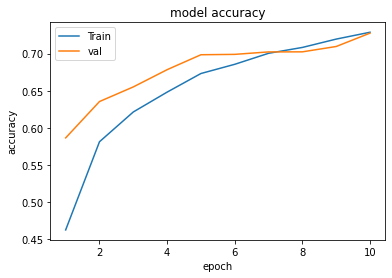

In [12]:
epoch_range=range(1,11)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','val'],loc='upper left')
plt.show()

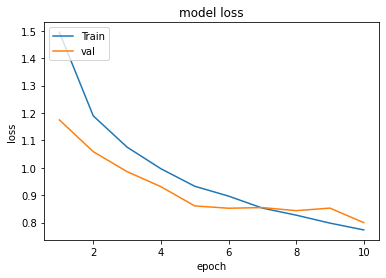

In [13]:
epoch_range=range(1,11)
plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','val'],loc='upper left')
plt.show()

In [14]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3 MB 4.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [15]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [21]:
y_pred=np.argmax(model.predict(x_test), axis=-1)
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [22]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [23]:
mat=confusion_matrix(y_test,y_pred)

In [24]:
mat

array([[669,  22,  60,  27,  21,   4,  13,   8, 106,  70],
       [  6, 849,   4,   8,   1,   2,   9,   0,  22,  99],
       [ 49,   4, 570,  68, 115,  75,  72,  18,  15,  14],
       [ 12,  15,  53, 535,  73, 183,  66,  17,  15,  31],
       [ 15,   1,  53,  69, 715,  34,  67,  33,   6,   7],
       [  8,   9,  43, 159,  43, 659,  28,  28,  12,  11],
       [  2,   3,  30,  59,  31,  26, 834,   2,   8,   5],
       [ 13,   2,  28,  50,  60,  73,   9, 737,   5,  23],
       [ 34,  39,  10,  11,   7,   9,   3,   3, 849,  35],
       [ 14,  66,   4,   9,   3,   4,   8,   6,  28, 858]])

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ffb5b8c0fd0>)

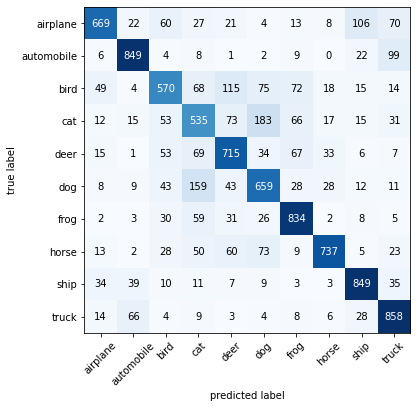

In [25]:
plot_confusion_matrix(mat,figsize=(6,6),class_names=classes)

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ffbe6a2bd50>)

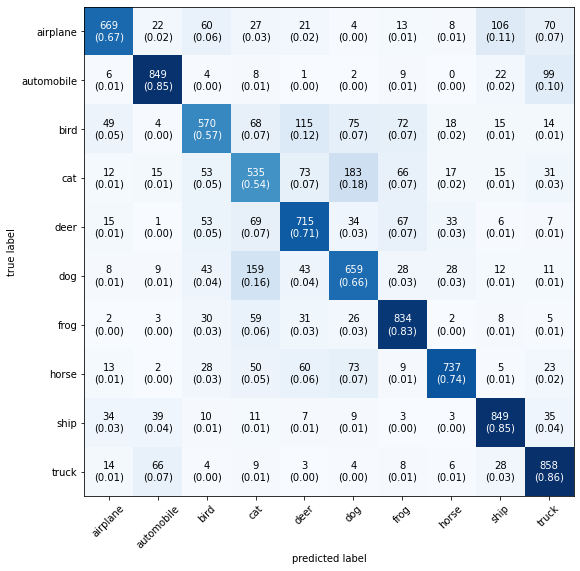

In [26]:
plot_confusion_matrix(mat,figsize=(9,9),class_names=classes,show_normed=True)

In [27]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.7996 - sparse_categorical_accuracy: 0.7275


[0.7995763421058655, 0.7275000214576721]